In [1]:
import pandas as pd

## DataFrame 条件查询操作

**加载 scientists.csv 数据集**

In [2]:
scientists = pd.read_csv('./data/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist
1,William Gosset,1876-06-13,1937/10/16,61,Statistician
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
4,Rachel Carson,1907/5/27,1964/4/14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,NaN,1954/6/7,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


**示例：获取 Age 大于 60 且 Age < 80 的科学家信息**

In [3]:
# scientists[(scientists['Age'] > 60) & (scientists['Age'] < 80)] 和下面效果等价
scientists.loc[(scientists['Age'] > 60) & (scientists['Age'] < 80)]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937/10/16,61,Statistician
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [15]:
# scientists[(scientists.Age > 60) & (scientists.Age < 80)] 和下面效果等价
scientists.loc[(scientists.Age > 60) & (scientists.Age < 80)]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937/10/16,61,Statistician
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [13]:
scientists.query('Age > 60 & Age < 80')

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937/10/16,61,Statistician
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


**示例：筛选出职业是 Chemist 和 Nurse 的科学家数据**

In [6]:
# 判断每一行的 Occupation 值是否是 'Chemist' 或 'Nurse'，结果是 bool 序列
scientists.Occupation.isin(['Chemist', 'Nurse'])

0     True
1    False
2     True
3     True
4    False
5    False
6    False
7    False
Name: Occupation, dtype: bool

In [7]:
scientists[scientists.Occupation.isin(['Chemist', 'Nurse'])]

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist


In [9]:
scientists.Age

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

## DataFrame 分组聚合操作

**示例：按照 Occupation 职业分组，并计算每组年龄的平均值**

In [16]:
scientists.groupby('Occupation')['Age'].mean()

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

In [17]:
scientists.groupby('Occupation').Age.mean()

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

**示例：按照 Occupation 职业分组，并计算每组的人数和年龄的平均值**

In [18]:
scientists.groupby('Occupation').agg({'Name': 'count', 'Age': 'mean'})

,Name,Age
Occupation,,
Biologist,1,56.0
Chemist,2,51.5
Computer Scientist,1,41.0
Mathematician,1,77.0
Nurse,1,90.0
Physician,1,45.0
Statistician,1,61.0


In [19]:
scientists.groupby('Occupation').aggregate({'Name': 'count', 'Age': 'mean'})

,Name,Age
Occupation,,
Biologist,1,56.0
Chemist,2,51.5
Computer Scientist,1,41.0
Mathematician,1,77.0
Nurse,1,90.0
Physician,1,45.0
Statistician,1,61.0


## DataFrame 排序操作

**示例：按照 Age 从小到大进行排序**

In [21]:
scientists.sort_values('Age')

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist
6,Alan Turing,NaN,1954/6/7,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician
4,Rachel Carson,1907/5/27,1964/4/14,56,Biologist
1,William Gosset,1876-06-13,1937/10/16,61,Statistician
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse


**示例：按照 Age 从大到小进行排序**

In [22]:
scientists.sort_values('Age', ascending=False)

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
1,William Gosset,1876-06-13,1937/10/16,61,Statistician
4,Rachel Carson,1907/5/27,1964/4/14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,NaN,1954/6/7,41,Computer Scientist
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist


**示例：按照行标签从大到小进行排序**

In [20]:
scientists.sort_index(ascending=False)

,Name,Born,Died,Age,Occupation
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
6,Alan Turing,NaN,1954/6/7,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician
4,Rachel Carson,1907/5/27,1964/4/14,56,Biologist
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse
1,William Gosset,1876-06-13,1937/10/16,61,Statistician
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist


In [25]:
# 示例：先按照Occupation升序，再按照Age降序
scientists.sort_values(['Occupation', 'Age'], ascending= [True, False])

,Name,Born,Died,Age,Occupation
4,Rachel Carson,1907/5/27,1964/4/14,56,Biologist
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist
6,Alan Turing,NaN,1954/6/7,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse
5,John Snow,1813-03-15,1858-06-16,45,Physician
1,William Gosset,1876-06-13,1937/10/16,61,Statistician


**补充：Series的sort_index和sort_values**

In [23]:
scientists['Age'].sort_values()

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [24]:
scientists['Age'].sort_index(ascending=False)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

## nlargest 和 nsmallest 函数

**示例：获取 Age 最大的前 3 行数据**

In [29]:
scientists.nlargest(3, columns='Age')

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist


In [28]:
scientists.sort_values('Age', ascending=False).head(3)

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910/8/13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934/7/4,66,Chemist


**示例：获取 Age 最小的前 3 行数据**

In [26]:
scientists.nsmallest(3, columns='Age')

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist
6,Alan Turing,NaN,1954/6/7,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician


In [27]:
scientists.sort_values('Age', ascending=True).head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920/7/25,1958/4/16,37,Chemist
6,Alan Turing,NaN,1954/6/7,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician


## Pandas 基本绘图操作

**示例：计算不同职业的科学家的平均寿命**

In [30]:
scientists_avg_age_by_occupation = scientists.groupby('Occupation').Age.mean()
scientists_avg_age_by_occupation

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

/Users/zhengyuan.zhou/opt/anaconda3/envs/datasci/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Occupation'>

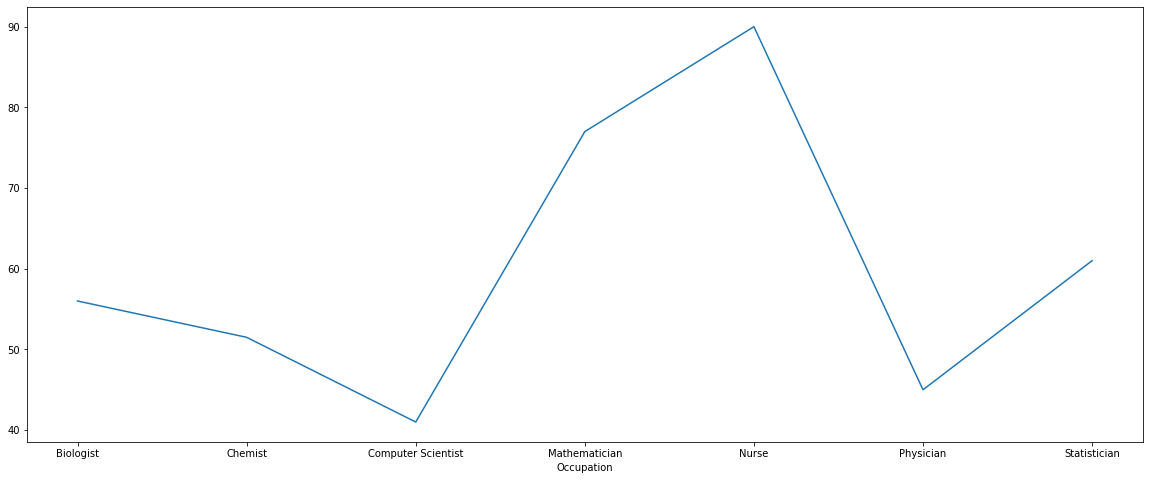

In [31]:
# 设置 jupyter 内嵌 matplotlib 绘图
%matplotlib inline
# 绘图
scientists_avg_age_by_occupation.plot(figsize=(20, 8))